<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/Bitcoin/bitcoinv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Import
import numpy as np
import pandas_datareader as pdr
import math
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
plt.style.use('fivethirtyeight')
from google.colab import files 

In [3]:
files.upload()

Saving BitCoin.csv to BitCoin.csv


{'BitCoin.csv': b',Date,Open,High,Low,Close,Volume,Market Cap\r\n0,2017-09-22,3628.02,3758.27,3553.53,3630.7,1194830000.0,60152300000\r\n1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1411480000.0,64677600000\r\n2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1213830000.0,64918500000\r\n3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1563980000.0,67520300000\r\n4,2017-09-18,3591.09,4079.23,3591.09,4065.2,1943210000.0,59514100000\r\n5,2017-09-17,3606.28,3664.81,3445.64,3582.88,1239150000.0,59757800000\r\n6,2017-09-16,3637.75,3808.84,3487.79,3625.04,1818400000.0,60271600000\r\n7,2017-09-15,3166.3,3733.45,2946.62,3637.52,4148070000.0,52453500000\r\n8,2017-09-14,3875.37,3920.6,3153.86,3154.95,2716310000.0,64191600000\r\n9,2017-09-13,4131.98,4131.98,3789.92,3882.59,2219410000.0,68432200000\r\n10,2017-12-09,4168.88,4344.65,4085.22,4130.81,1864530000.0,69033400000\r\n11,2017-11-09,4122.47,4261.67,4099.4,4161.27,1557330000.0,68256000000\r\n12,2017-10-09,4229.34,4245.44,3951.04,4122.94,1679090000.0,700

In [72]:
data = pd.read_csv('BitCoin.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [73]:
for i in range(0,1609):
  dt = datetime.strptime(data['Date'][i],'%Y-%m-%d')
  data['Date'][i] = dt
data = data.sort_values(by='Date')
data = data.set_index('Date')
data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000
2013-01-06,128.81,129.78,127.20,129.30,7521959.816,1445800000
2013-01-07,97.51,97.66,86.30,88.05,5759985.732,1107130000
2013-01-08,106.21,108.00,103.01,104.00,6348194.873,1220190000
2013-01-09,135.14,145.81,134.81,138.34,8179728.096,1572230000


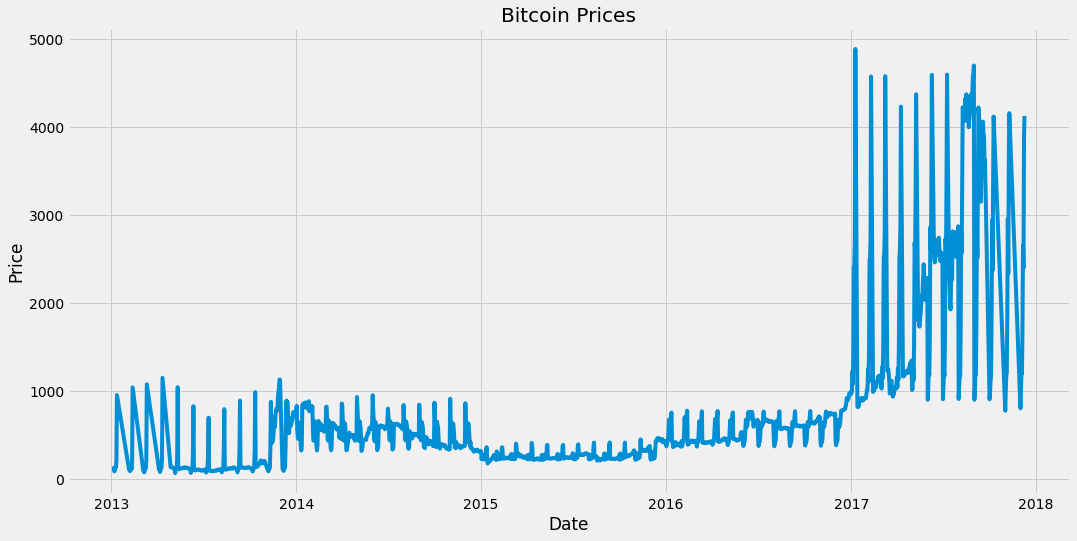

In [74]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Prices')
plt.xlabel('Date', fontsize=17)
plt.ylabel ('Price', fontsize=17)
plt.plot(data['Close'])
plt.show()

In [75]:
#manually minmaxscale 
Y = data['Close']
data = data.drop(columns=['Close'])
for col in data:
  data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())
Y = Y.values
data = data.values 
trainX,testX,trainY,testY = tts(data,Y,test_size=0.15,shuffle=False)

In [77]:
#reshape
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

In [76]:
#build LSTM 
arch = Sequential()
arch.add(LSTM(75, return_sequences = True, input_shape = (trainX.shape[1],1)))
arch.add(LSTM(50, return_sequences = False))
arch.add(Dense(32))
arch.add(Dense(32))
arch.add(Dense(1))
#compile
arch.compile(optimizer='adam', loss = 'mean_squared_error')

In [78]:
arch.fit(trainX, trainY, batch_size = 8, epochs = 12)

Epoch 1/12
171/171 [==============================] - 4s 7ms/step - loss: 258196.8411
Epoch 2/12
171/171 [==============================] - 1s 6ms/step - loss: 90605.3828
Epoch 3/12
171/171 [==============================] - 1s 7ms/step - loss: 38951.8773
Epoch 4/12
171/171 [==============================] - 1s 7ms/step - loss: 18455.1320
Epoch 5/12
171/171 [==============================] - 1s 7ms/step - loss: 2632.3524
Epoch 6/12
171/171 [==============================] - 1s 6ms/step - loss: 12252.6959
Epoch 7/12
171/171 [==============================] - 1s 6ms/step - loss: 8809.5181
Epoch 8/12
171/171 [==============================] - 1s 7ms/step - loss: 5896.3693
Epoch 9/12
171/171 [==============================] - 1s 6ms/step - loss: 5143.9673
Epoch 10/12
171/171 [==============================] - 1s 6ms/step - loss: 1000.6484
Epoch 11/12
171/171 [==============================] - 1s 7ms/step - loss: 6785.3716
Epoch 12/12
171/171 [==============================] - 1s 7ms/step -

In [79]:
predictions = arch.predict(testX)
predictions = np.reshape(predictions, (predictions.size,))

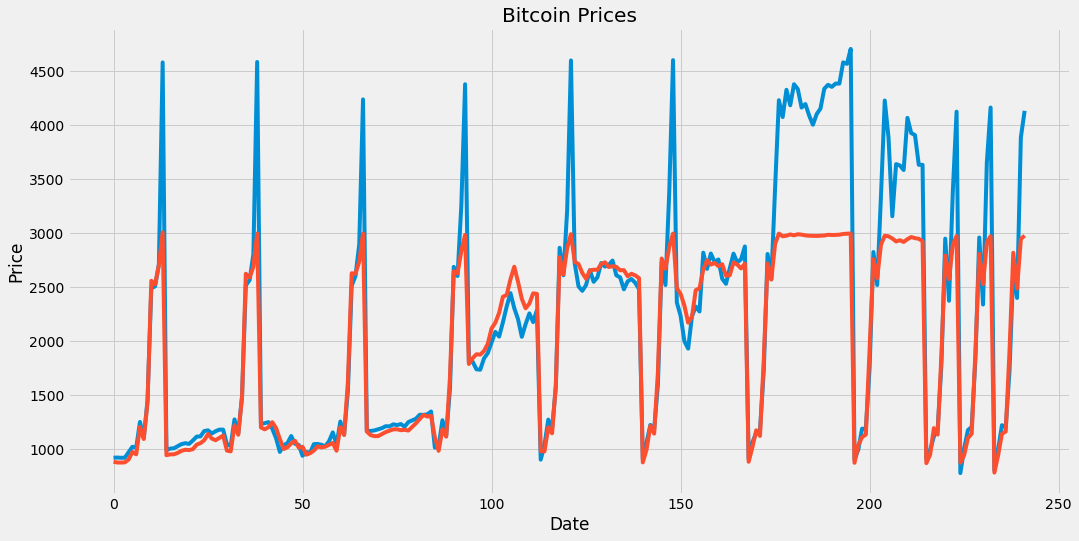

In [83]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Prices')
plt.xlabel('Date', fontsize=17)
plt.ylabel ('Price', fontsize=17)
plt.plot(testY)
plt.plot(predictions)
plt.show()